In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
# read the dataset
df_train = pd.read_csv('Loans_Training.txt')
df_test = pd.read_csv('Loans_Test.txt')

In [3]:
df_train.head(5) # display top 5 rows of training data

Approval  Debt-to-Income Ratio  FICO Score  Request Amount  Interest
0        F                   0.0         397            1000     450.0
1        F                   0.0         403             500     225.0
2        F                   0.0         408            1000     450.0
3        F                   0.0         408            2000     900.0
4        F                   0.0         411            5000    2250.0

In [4]:
df_test.head(5) # display top 5 rows of test data

Approval  Debt-to-Income Ratio  FICO Score  Request Amount  Interest
0        F                   0.0         413            2000     900.0
1        F                   0.0         449            1000     450.0
2        F                   0.0         454            6000    2700.0
3        F                   0.0         456            1000     450.0
4        F                   0.0         457            1000     450.0

In [5]:
# convert T and F of Approval to 1 and 0

df_train['Approval'] = np.where(df_train['Approval']=='F',0,1)
df_test['Approval'] = np.where(df_test['Approval']=='F',0,1)

In [6]:
df_train # display the training data

Approval  Debt-to-Income Ratio  FICO Score  Request Amount  Interest
0              0                  0.00         397            1000     450.0
1              0                  0.00         403             500     225.0
2              0                  0.00         408            1000     450.0
3              0                  0.00         408            2000     900.0
4              0                  0.00         411            5000    2250.0
...          ...                   ...         ...             ...       ...
150297         1                  0.38         709           19000    8550.0
150298         1                  0.38         722           17000    7650.0
150299         1                  0.38         747           11000    4950.0
150300         1                  0.39         679           10000    4500.0
150301         1                  0.39         769            7000    3150.0

[150302 rows x 5 columns]

In [7]:
df_test # display the test data

Approval  Debt-to-Income Ratio  FICO Score  Request Amount  Interest
0             0                  0.00         413            2000     900.0
1             0                  0.00         449            1000     450.0
2             0                  0.00         454            6000    2700.0
3             0                  0.00         456            1000     450.0
4             0                  0.00         457            1000     450.0
...         ...                   ...         ...             ...       ...
49693         1                  0.38         662           14000    6300.0
49694         1                  0.38         664           16000    7200.0
49695         1                  0.38         676            4000    1800.0
49696         1                  0.38         680            6000    2700.0
49697         1                  0.39         662             500     225.0

[49698 rows x 5 columns]

In [8]:
# creating the x and y for training data
X_train = df_train.iloc[:, [1, 2, 3]].values
y_train = df_train.iloc[:, 0].values

# creating the x and y for test data
X_test = df_test.iloc[:, [1, 2, 3]].values
y_test = df_test.iloc[:, 0].values

In [9]:
# standardizing the training and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# CART Model

In [10]:
# build the Decision Tree classifier model
# criterion = 'gini' for CART Model

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0 , min_samples_leaf=1000)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=1000, random_state=0)

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

In [12]:
# predicting on training data
y_train_pred = classifier.predict(X_train)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred) # accuracy on training data

0.8496693324107464

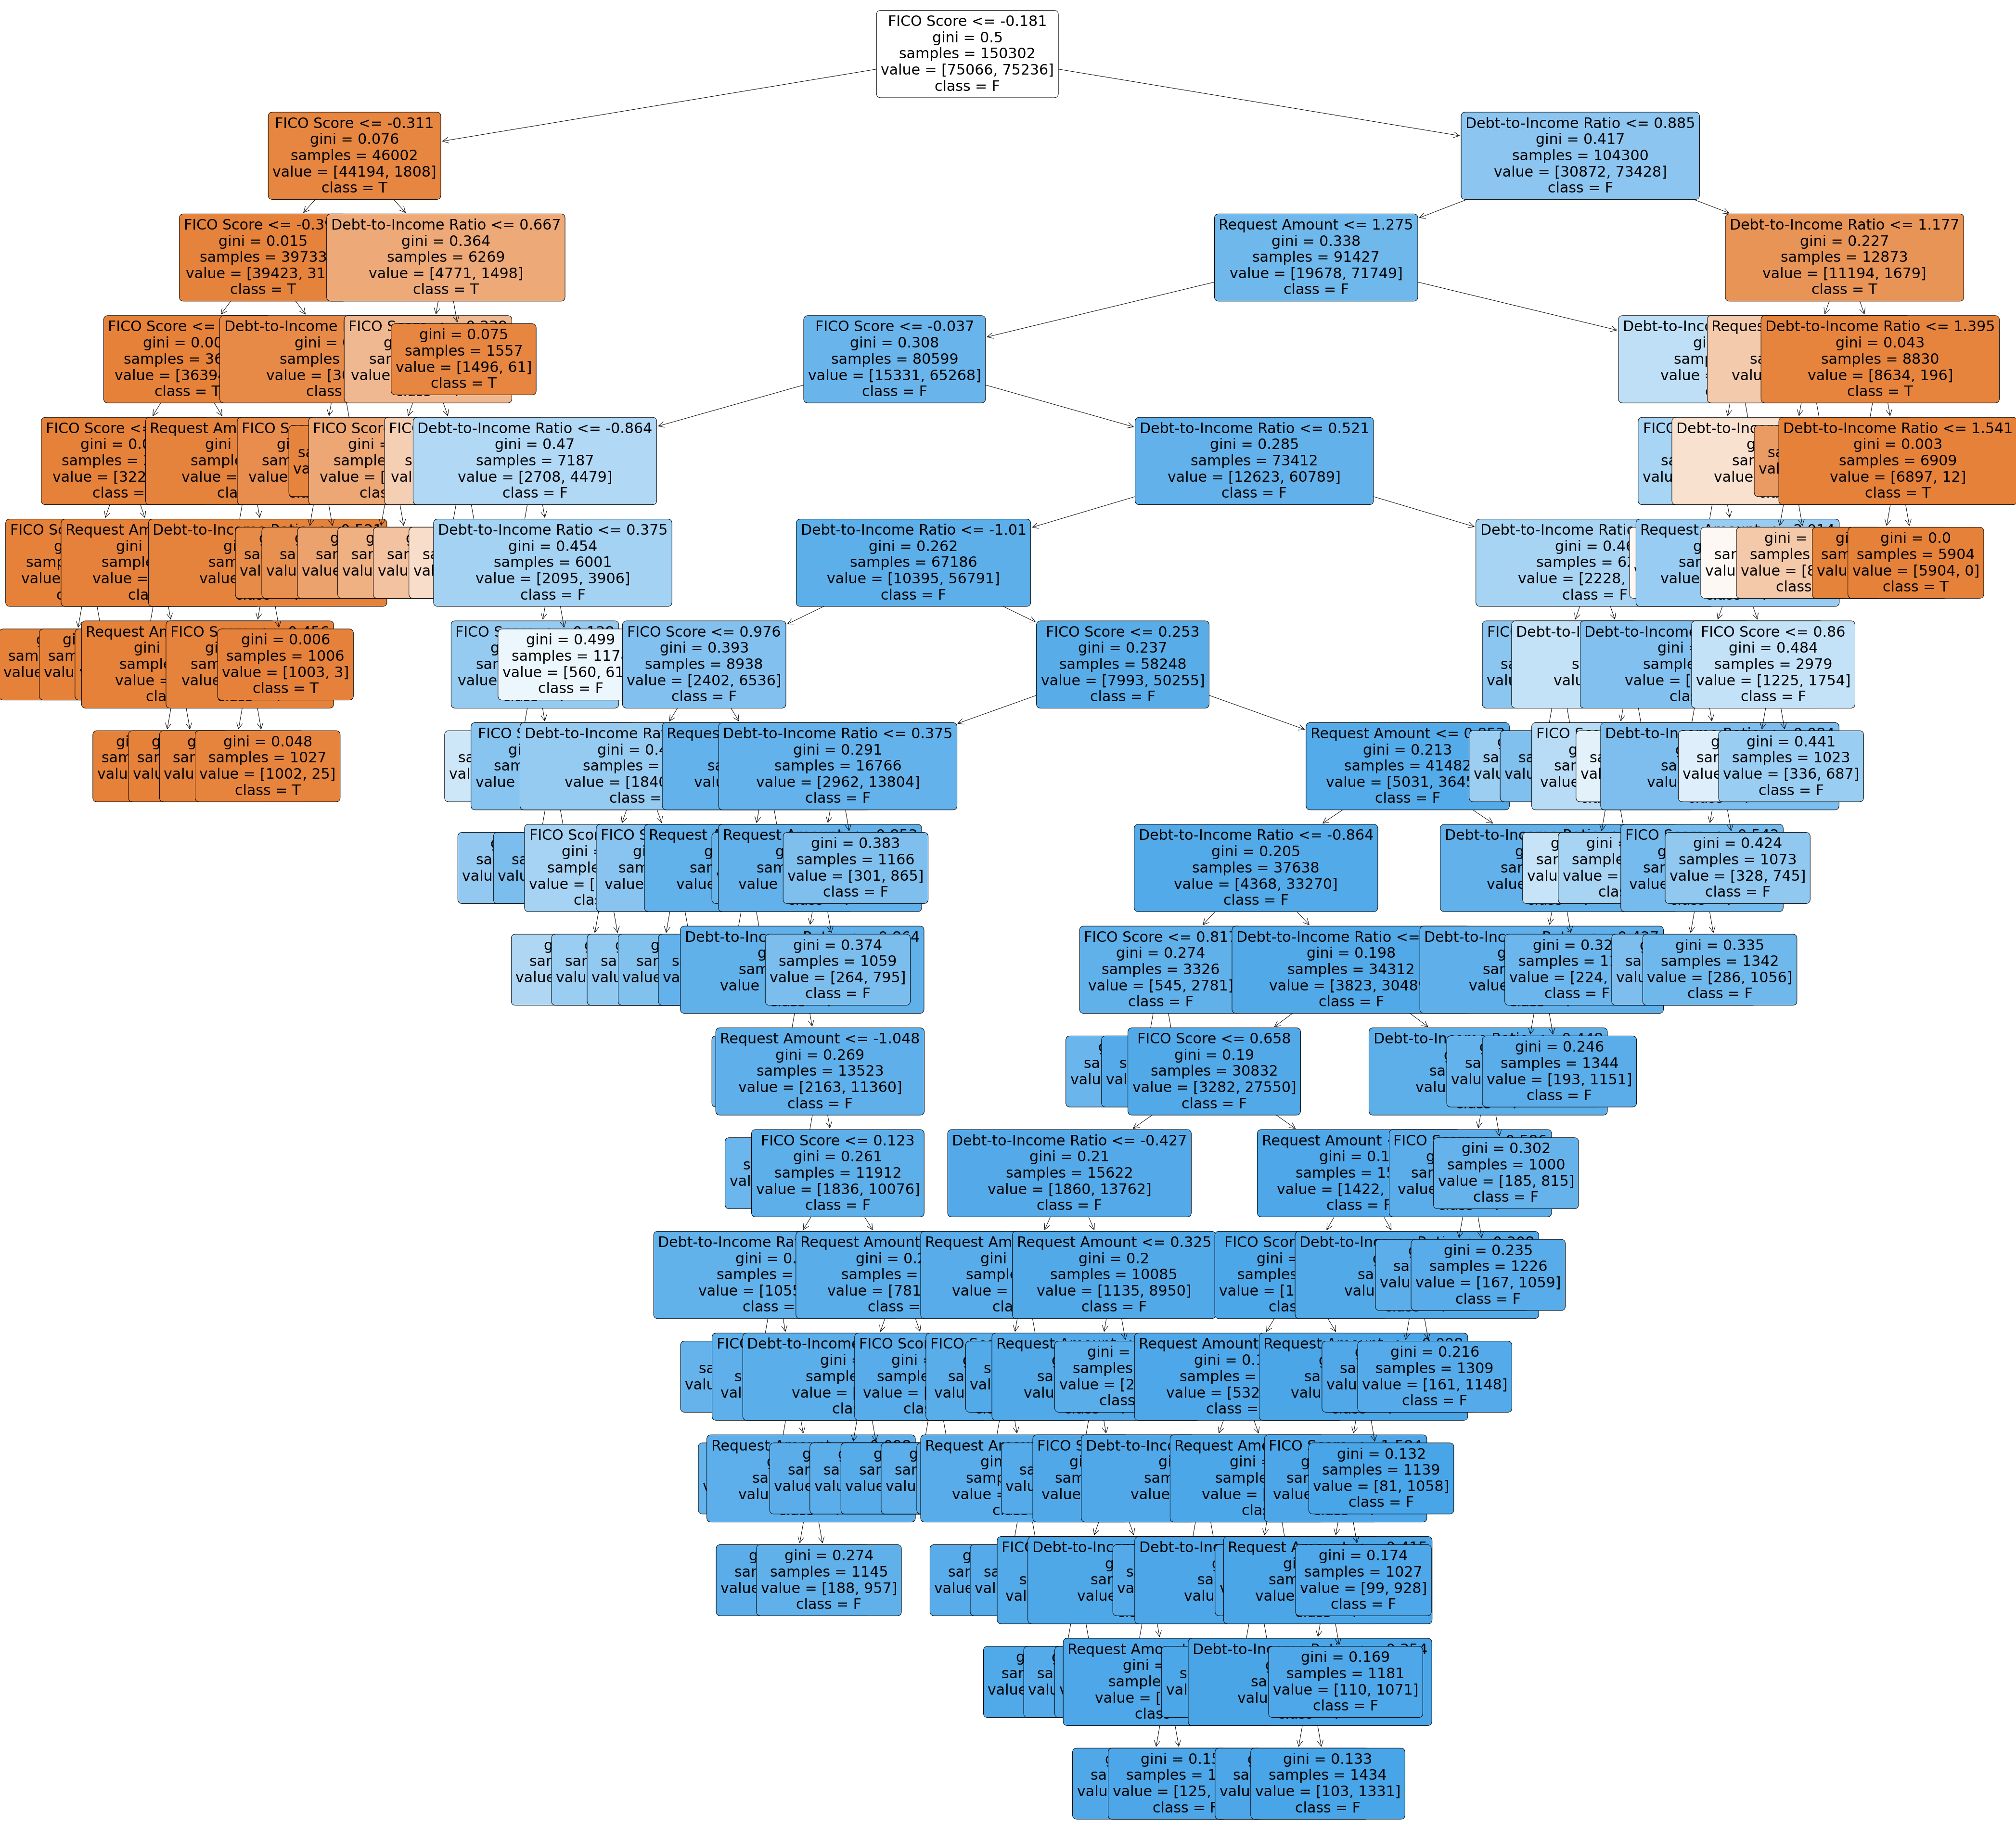

In [14]:
# draw decision Tree
# adjust figsize and fontsize for better visualization of Decision Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (70,70))
a=tree.plot_tree(classifier,feature_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount',
       'Interest'], 
               class_names=['T','F'],
               filled = True,rounded=True,fontsize=30)
plt.show()

# Q.1

# C5.0 Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# criterion = 'entropy' is used for c5.0 model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 , min_samples_leaf=1000)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000,
                       random_state=0)

In [16]:
# prediction on training data
y_train_pred = classifier.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred) # accuracy on training data

0.8505808305944033

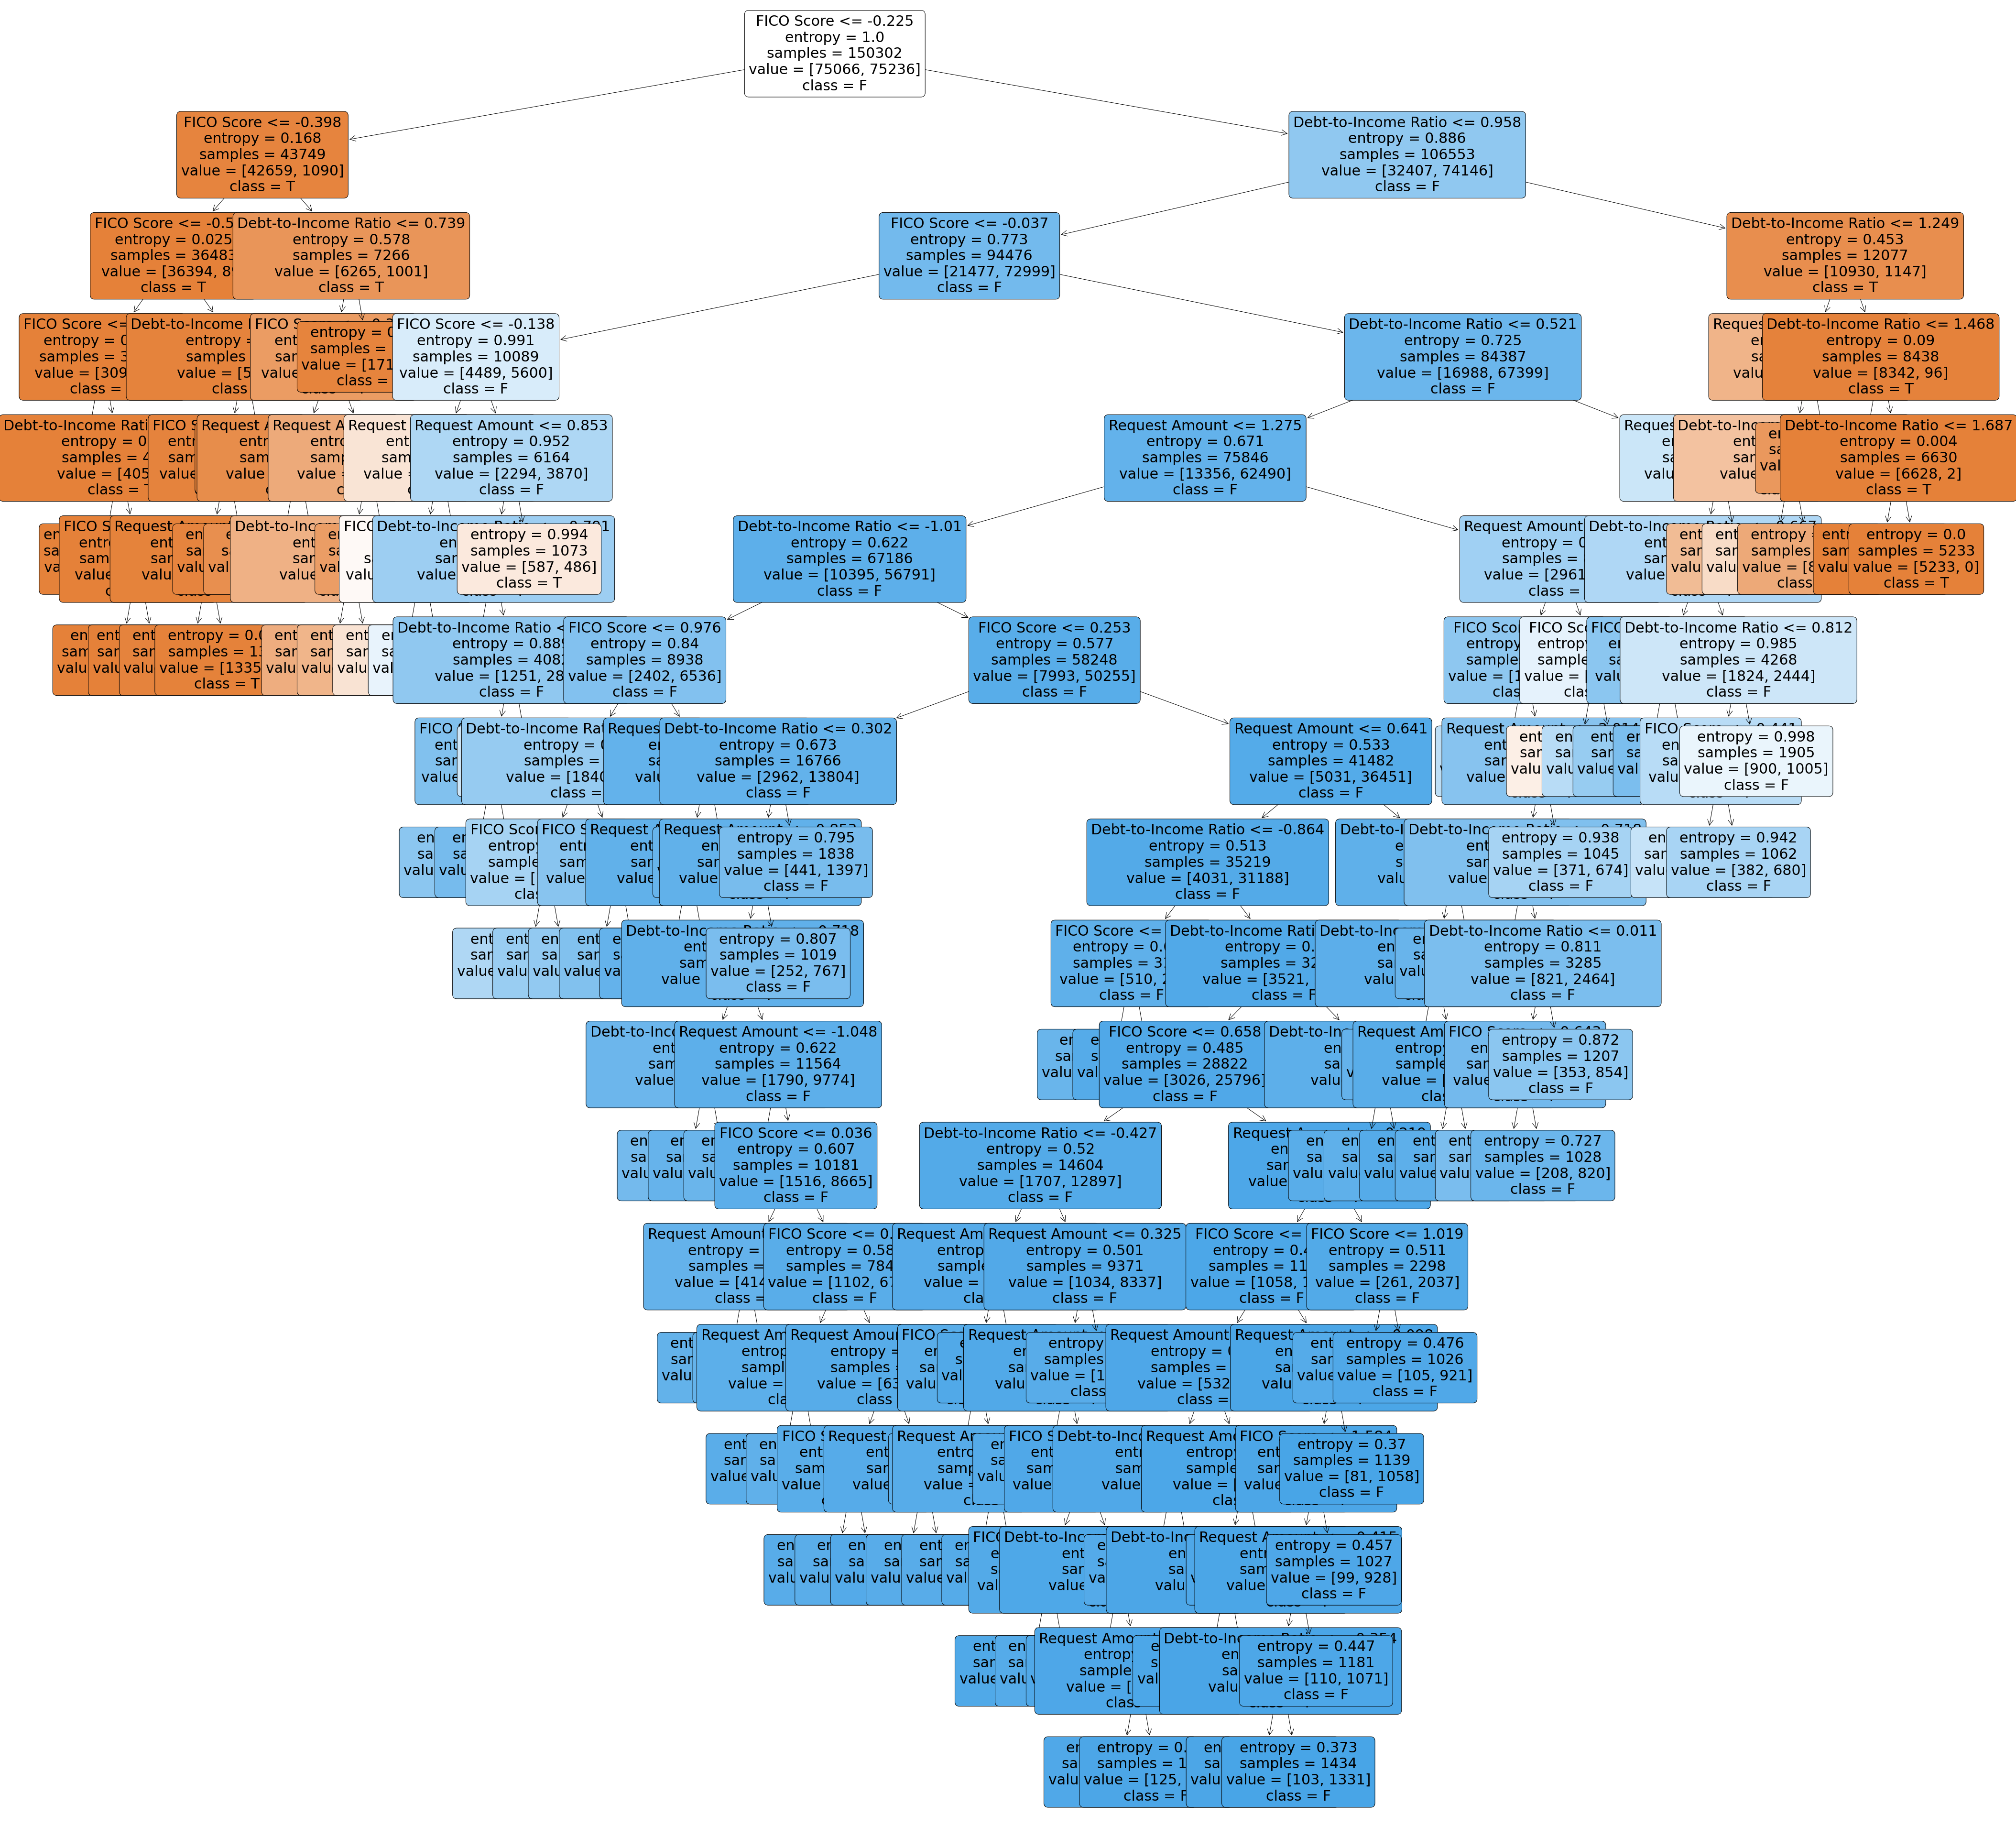

In [18]:
# draw decision Tree
# adjust figsize and fontsize for better visualization of Decision Tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (70,70))
a=tree.plot_tree(classifier,feature_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount',
       'Interest'], 
               class_names=['T','F'],
               filled = True,rounded=True,fontsize=30)
plt.show()

- 1st split is on the basis of FICO Score
- 2nd split is on the basis of Debt-to-Income Ratio
- and so on, as it is visible in the above tree

# Q.2

- Similarities: FICO Score acts as a 1st split for both the Model
- Differences: criterion = 'entropy' is used for C5.0 Model i.e. it is based on information gain, whereas criterion = 'gini' is used for CART Model i.e. Gini impurity
- Accuracy of both the model is also different on training data

# Q.3

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# build a model
classifier_test = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 , min_samples_leaf=1000)
classifier_test.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000,
                       random_state=0)

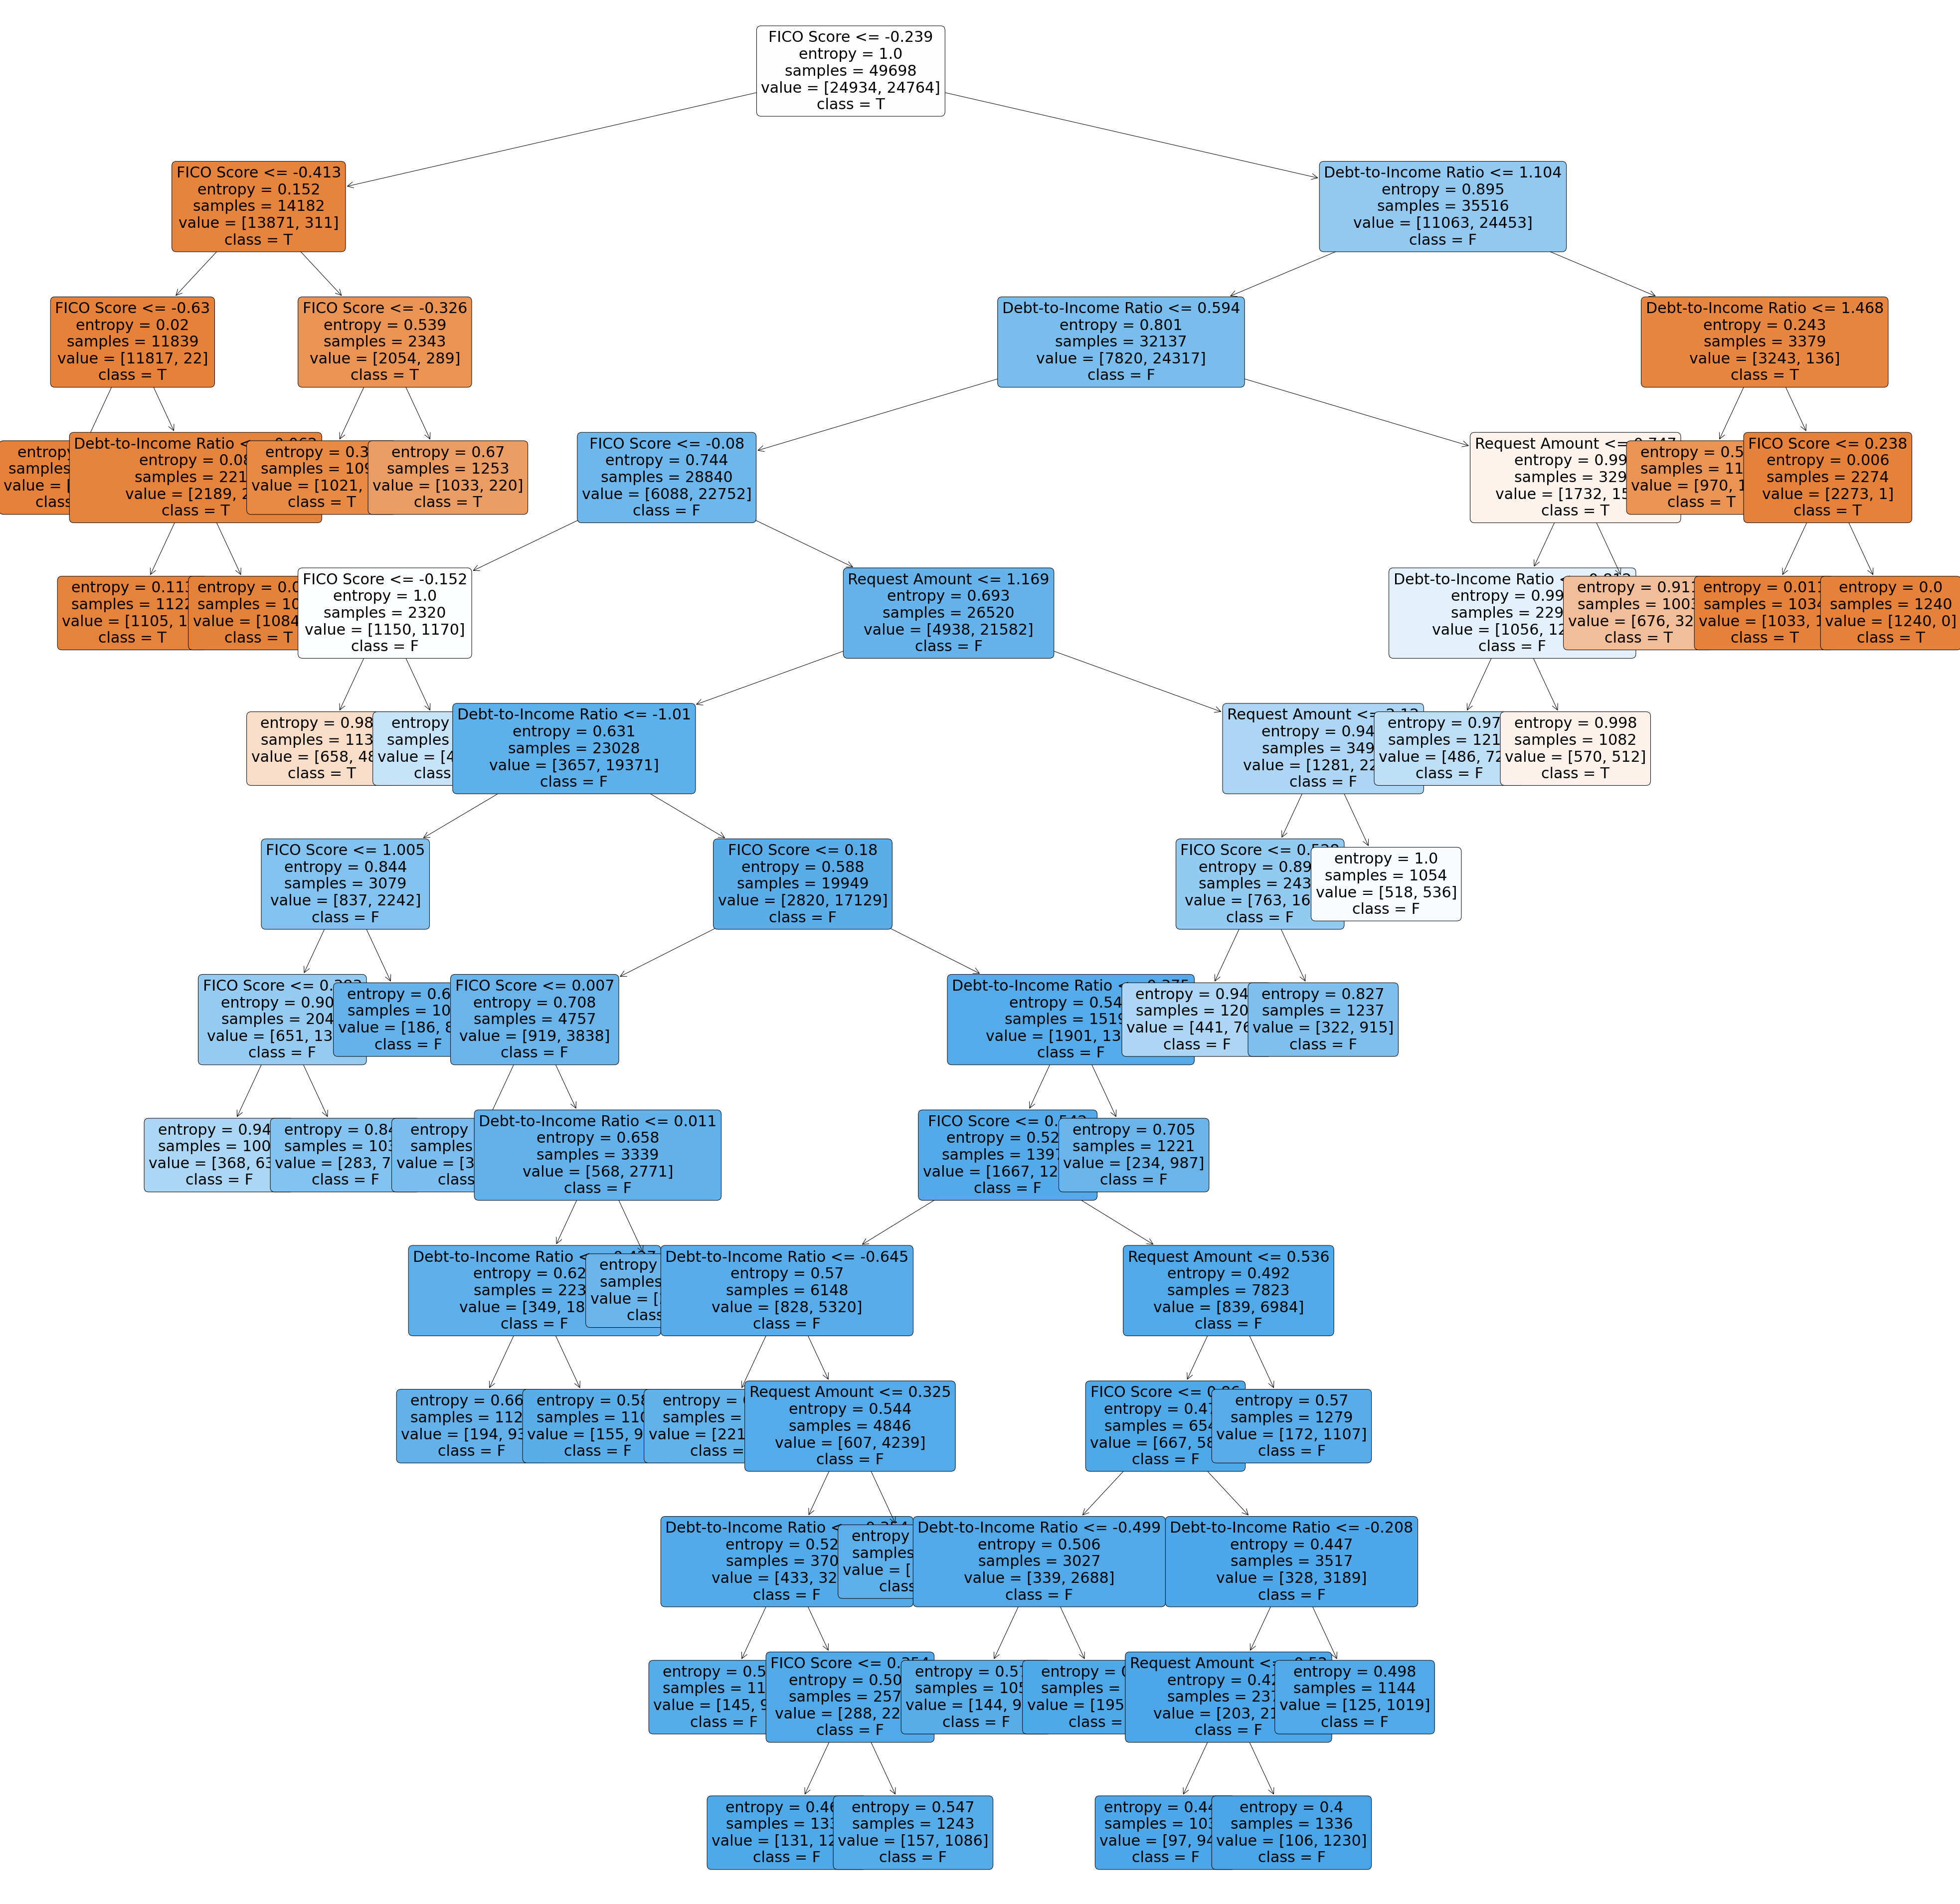

In [20]:
# draw decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (70,70))
a=tree.plot_tree(classifier_test,feature_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount',
       'Interest'], 
               class_names=['T','F'],
               filled = True,rounded=True,fontsize=30)
plt.show()

- from the decision tree diagram, it is clear that both the training Tree and Test Tree is different